___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

2023-05-08 19:32:09.325906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

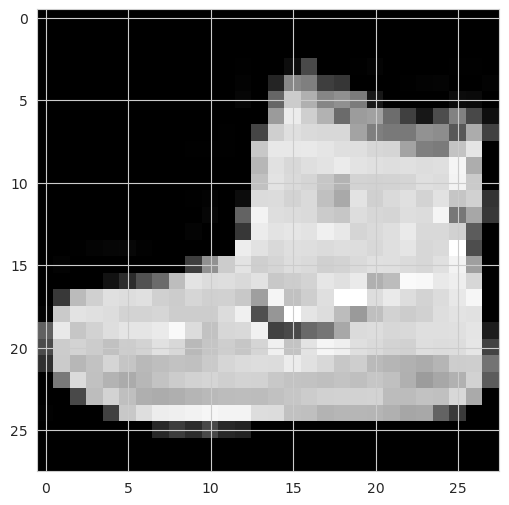

In [10]:
plt.imshow(X_train[0], cmap="gray");

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train[0]

9

In [13]:
classes[9]

'Ankle boot'

/tmp/ipykernel_4036/1461618456.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


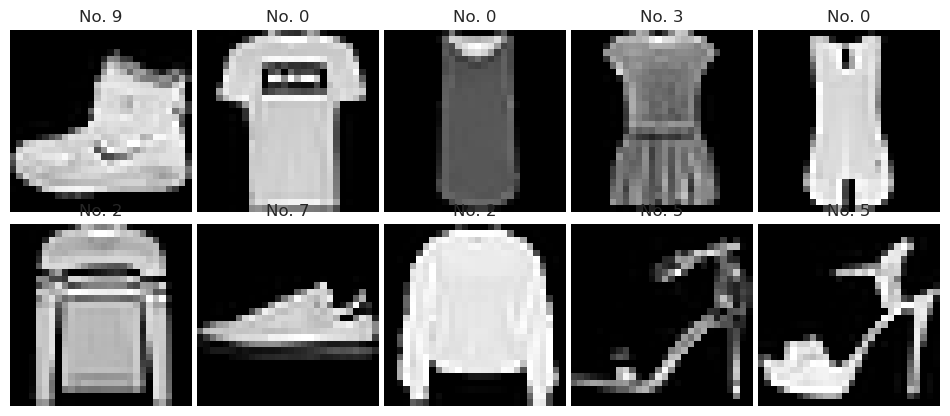

In [14]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(
    2, 5, figsize=(12, 5), gridspec_kw={"wspace": 0.03, "hspace": 0.02}, squeeze=True
)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 + c
        ax[r, c].axis("off")
        ax[r, c].set_title("No. %d" % y_train[image_index])
        ax[r, c].imshow(X_train[image_index], cmap="gray")

plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train.min()

0

In [16]:
X_train.max()

255

In [17]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train.min()

0.0

In [19]:
X_train.max()

1.0

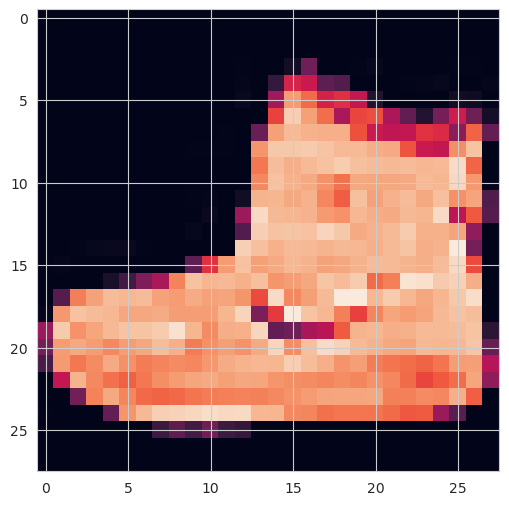

In [20]:
plt.imshow(X_train[0]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
y_train.shape

(60000,)

In [28]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [29]:
y_train[8]

5

In [30]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()
model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 256)               4129024   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

Number of parameter in CL

$((n \times m \times l) + 1) \times k$

$n \times m $: filter shape

$l $: number of input channel (feature maps as input)

$k $: number of output channel (feature maps as output)

In [34]:
((3 * 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [37]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4334 - accuracy: 0.8493 - val_loss: 0.3144 - val_accuracy: 0.8873
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3054 - accuracy: 0.8907 - val_loss: 0.3012 - val_accuracy: 0.8913
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2804 - accuracy: 0.9003 - val_loss: 0.2899 - val_accuracy: 0.9009
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - accuracy: 0.9059 - val_loss: 0.2845 - val_accuracy: 0.9040
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2628 - accuracy: 0.9077 - val_loss: 0.2861 - val_accuracy: 0.9027
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9093 - val_loss: 0.2765 - val_accuracy: 0.9062
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9116 - val_loss: 0.2903 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.433,0.849,0.314,0.887
1,0.305,0.891,0.301,0.891
2,0.280,0.900,0.290,0.901
3,0.265,0.906,0.284,0.904
4,0.263,0.908,0.286,0.903


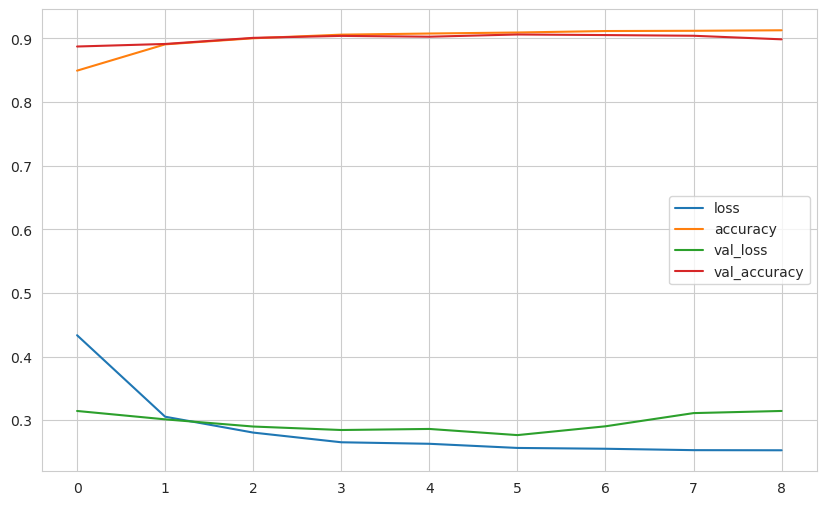

In [40]:
summary.plot();

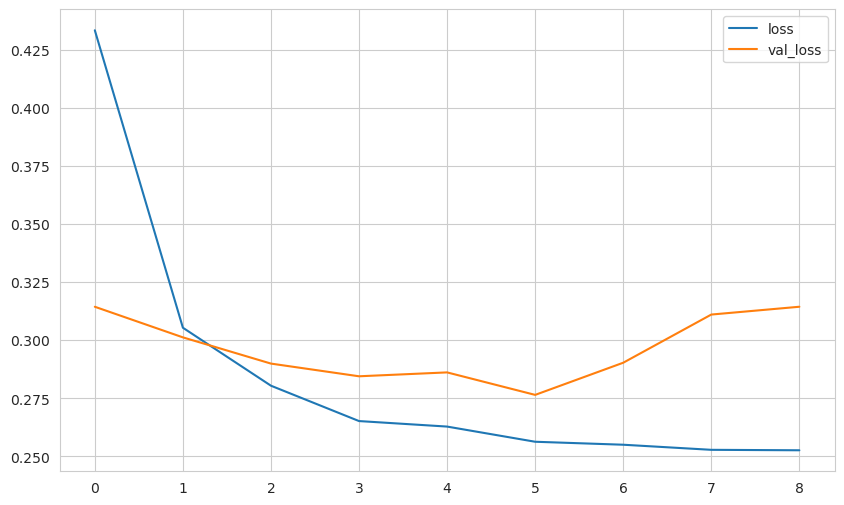

In [41]:
summary[["loss", "val_loss"]].plot();

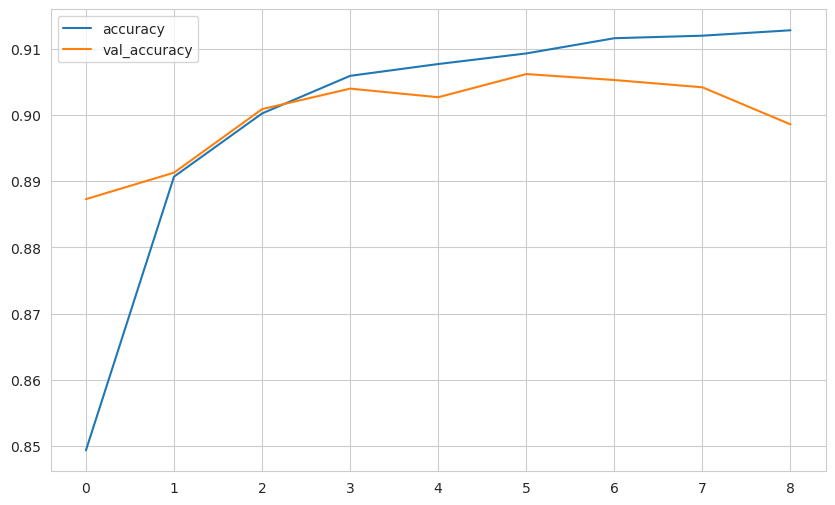

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2765 - accuracy: 0.9062


[0.276461124420166, 0.9061999917030334]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.276461124420166
Test accuracy: 0.9061999917030334


In [46]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[2.5937914e-07, 2.4276851e-06, 5.8225637e-06, ..., 2.4267221e-03,
        1.2209715e-06, 9.9590588e-01],
       [2.2698295e-10, 6.7218504e-18, 1.0000000e+00, ..., 2.0654606e-15,
        5.5164846e-15, 1.4436505e-17],
       [4.9848342e-10, 1.0000000e+00, 6.7907884e-12, ..., 1.2267627e-10,
        1.1061784e-13, 3.1393036e-15],
       ...,
       [7.1368267e-09, 1.2000773e-12, 7.4832321e-11, ..., 4.3508955e-13,
        9.9999988e-01, 3.2810115e-12],
       [1.1555983e-09, 1.0000000e+00, 8.5719633e-11, ..., 1.3733333e-09,
        2.5973314e-12, 3.1381230e-12],
       [1.8267984e-02, 1.8959956e-03, 5.4997336e-02, ..., 1.7661843e-01,
        1.3569432e-02, 8.9950681e-02]], dtype=float32)

In [47]:
pred_prob.shape

(10000, 10)

In [48]:
pred_prob[0]

array([2.5937914e-07, 2.4276851e-06, 5.8225637e-06, 4.9425589e-06,
       1.0340050e-06, 1.6497211e-03, 1.9308179e-06, 2.4267221e-03,
       1.2209715e-06, 9.9590588e-01], dtype=float32)

In [49]:
np.argmax(pred_prob[0])

9

In [50]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
y_pred.shape

(10000,)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.87      0.84      1000
           3       0.90      0.93      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [53]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [54]:
print(confusion_matrix(y_test, y_pred))

[[854   0  25  17   6   0  94   0   4   0]
 [  0 981   0  10   4   0   3   0   2   0]
 [ 12   0 870  10  57   0  51   0   0   0]
 [  8   8  10 932  21   0  20   0   1   0]
 [  1   0  80  35 851   0  32   0   1   0]
 [  0   0   0   1   0 976   0  15   0   8]
 [ 98   1  85  30  80   0 700   0   6   0]
 [  0   0   0   0   0   4   0 989   0   7]
 [  1   2   1   5   2   1  11   3 974   0]
 [  0   0   0   0   0   6   1  58   0 935]]


In [55]:
(y_test != y_pred).sum()

938

## Prediction

In [56]:
samples = [X_test[0], X_test[1], X_test[2]]

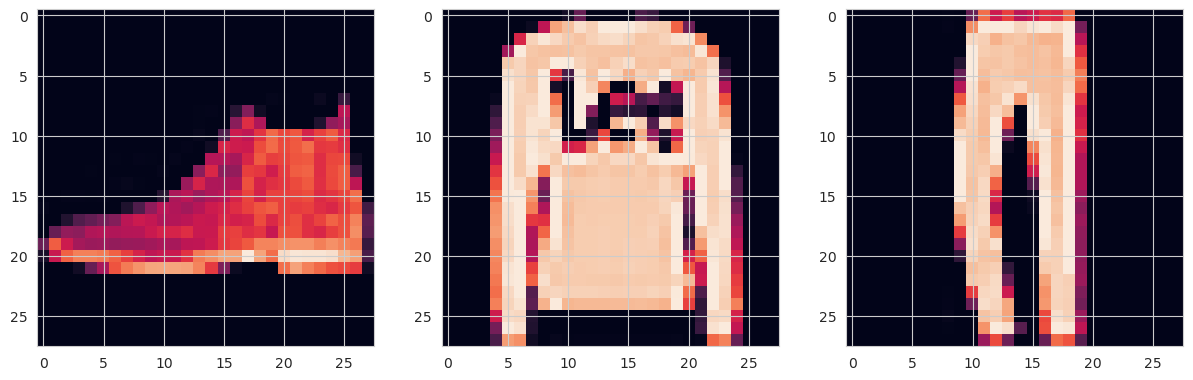

In [57]:
plt.figure(figsize=(20, 5))
index = 1
for i in samples:
    plt.subplot(1, 4, index)
    plt.imshow(i.reshape(28, 28))
    index += 1

In [58]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [59]:
samples.shape

(3, 28, 28, 1)

In [60]:
pred_prob = model.predict(samples)
pred_prob

1/1 [==============================] - 0s 48ms/step


array([[2.5937939e-07, 2.4276851e-06, 5.8225637e-06, 4.9425539e-06,
        1.0340050e-06, 1.6497202e-03, 1.9308179e-06, 2.4267221e-03,
        1.2209715e-06, 9.9590588e-01],
       [2.2698295e-10, 6.7218760e-18, 1.0000000e+00, 1.1248967e-11,
        3.8473041e-10, 1.5455244e-16, 8.9954844e-10, 2.0654606e-15,
        5.5165058e-15, 1.4436451e-17],
       [4.9848248e-10, 1.0000000e+00, 6.7908010e-12, 1.2529738e-10,
        2.9407524e-10, 3.5473627e-12, 1.2477330e-12, 1.2267627e-10,
        1.1061763e-13, 3.1393036e-15]], dtype=float32)

In [61]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [62]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [63]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [64]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___